In [18]:
import pandas as pd
import numpy as np

In [19]:
d = pd.read_csv('pima_indians.csv')
d

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [20]:
d.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [21]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
x = d[cols].values
y = d['Outcome'].values

In [22]:
from sklearn.model_selection import train_test_split

# Split our data into the training sets and the testing sets
# Each set has a pair of X and y
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=45)

# Train our model with our training data.
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=45)

In [24]:
from sklearn.tree import export_text
#from sklearn.tree import plot_tree
#plot_tree(dt)
r = export_text(dt, feature_names=cols)
print(r)

|--- Glucose <= 129.50
|   |--- BMI <= 26.30
|   |   |--- BMI <= 9.10
|   |   |   |--- class: 0
|   |   |--- BMI >  9.10
|   |   |   |--- class: 0
|   |--- BMI >  26.30
|   |   |--- Age <= 24.50
|   |   |   |--- class: 0
|   |   |--- Age >  24.50
|   |   |   |--- class: 0
|--- Glucose >  129.50
|   |--- BMI <= 29.95
|   |   |--- Pregnancies <= 1.50
|   |   |   |--- class: 0
|   |   |--- Pregnancies >  1.50
|   |   |   |--- class: 0
|   |--- BMI >  29.95
|   |   |--- Glucose <= 158.50
|   |   |   |--- class: 1
|   |   |--- Glucose >  158.50
|   |   |   |--- class: 1



In [25]:
#pip install graphviz

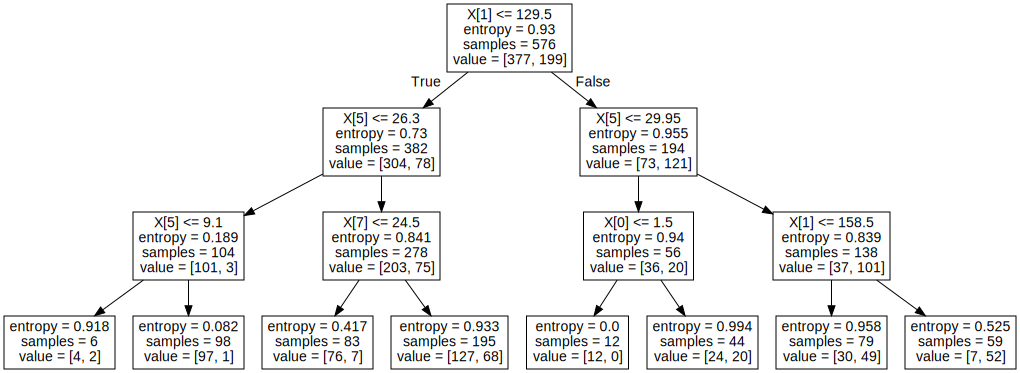

In [26]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import display

display(graphviz.Source(export_graphviz(dt)))

In [27]:
y_pred = dt.predict(X_test)

In [28]:
print(y_pred)
print(y_test)

[0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 1 1 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 0]


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[111,  12],
       [ 31,  38]], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuarcy of the model is',round(accuracy, 2),'%')

Accuarcy of the model is 77.6 %
